In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [7]:
adspend = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/adspend.csv', parse_dates=['event_date'], index_col='event_date')
installs = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/installs.csv', parse_dates=['event_date'], index_col='event_date')
payouts = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/payouts.csv', parse_dates=['event_date'], index_col='event_date')
revenue = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/revenue.csv', parse_dates=['event_date'], index_col='event_date')

In [48]:
adspend.head()

,country_id,network_id,client_id,value_usd
event_date,,,,
2022-01-01,1,10,71,4.680000
2022-01-01,1,10,94,223.439997
2022-01-01,1,10,104,0.800000
2022-01-01,1,10,121,4.870000
2022-01-01,1,10,174,1.300000


In [14]:
installs.head()

,install_id,country_id,app_id,network_id,device_os_version
event_date,,,,,
2022-12-13,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,10
2022-12-14,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,10
2022-12-30,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,11
2022-12-30,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,8.0.0
2022-12-05,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,11


In [15]:
payouts.head()

,install_id,value_usd
event_date,,
2022-12-21,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,0.254376
2022-12-28,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,0.361216
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.359006
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.253416
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.253416


In [16]:
revenue.head()

,install_id,value_usd
event_date,,
2022-12-16,213197bd66cd889d103ab9059709458e49808214837508...,1.5800
2022-12-21,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,6.7500
2022-12-21,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.6200
2022-12-20,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,0.0015
2022-12-16,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,0.5400


#### 0. Take a look to data

In [49]:
adspend.groupby(['country_id'])['value_usd'].sum()

country_id
1      243186.687782
17        334.392000
109     10053.718011
213       501.178006
Name: value_usd, dtype: float64

In [58]:
installs.groupby(['country_id'])['install_id'].count()

country_id
1      135242
17      10671
109     61841
213      9134
Name: install_id, dtype: int64

In [61]:
payouts

,install_id,value_usd
event_date,,
2022-12-21,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,0.254376
2022-12-28,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,0.361216
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.359006
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.253416
2022-12-10,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,0.253416
...,...,...
2022-01-26,f280f52a3e6e7e105204ae6e5533bdcf149371807f1b5e...,1.910376
2022-01-27,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,0.383418
2022-01-26,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,0.757368


In [74]:
merged_df = pd.merge(installs, payouts[['install_id', 'value_usd']], on='install_id', how='inner', suffixes=('', '_payouts'))
merged_df = merged_df.merge(revenue[['install_id', 'value_usd']], on='install_id', how='inner', suffixes=('', '_revenue'))

In [75]:
merged_df

,install_id,country_id,app_id,network_id,device_os_version,value_usd,value_usd_revenue
0,2eba0b65d2c31d2d07cfd254c04df6d205c711dee9b97e...,1,97,26,12,1.791062,20.700000
1,2eba0b65d2c31d2d07cfd254c04df6d205c711dee9b97e...,1,97,26,12,14.307300,20.700000
2,0daca836eb21c5d66f22d5b7473f10da9f9b2c5d861569...,1,73,10,8.0.0,0.357544,0.200000
3,0daca836eb21c5d66f22d5b7473f10da9f9b2c5d861569...,1,73,10,8.0.0,0.357544,0.240000
4,0daca836eb21c5d66f22d5b7473f10da9f9b2c5d861569...,1,73,10,8.0.0,0.357544,0.230000
...,...,...,...,...,...,...,...
618612,309e3f0babe204281d145a9431dd59737ea58644315150...,1,174,60,11,0.379304,1.400000
618613,309e3f0babe204281d145a9431dd59737ea58644315150...,1,174,60,11,0.379304,0.019784
618614,309e3f0babe204281d145a9431dd59737ea58644315150...,1,174,60,11,0.379304,7.700000
618615,309e3f0babe204281d145a9431dd59737ea58644315150...,1,174,60,11,0.379304,0.022435


### 1. Distribution of advertising spend by country and network.

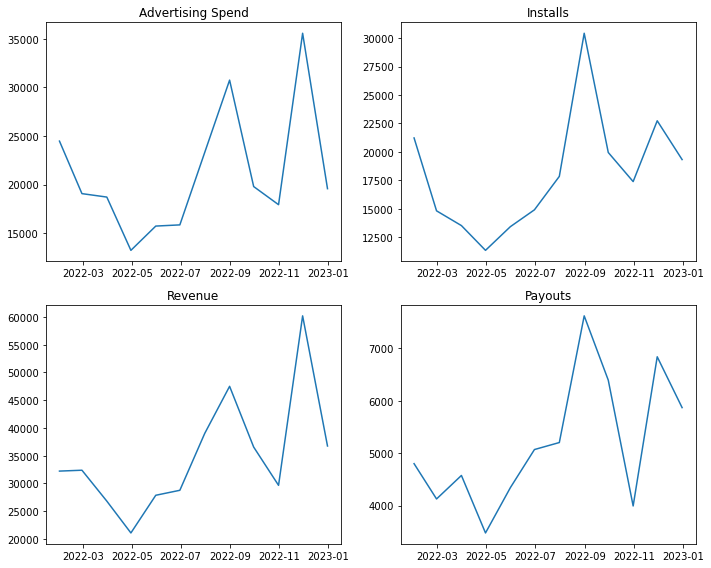

In [18]:
adspend_daily = adspend.resample('M').sum()
installs_daily = installs.resample('M').count()
revenue_daily = revenue.resample('M').sum()
payouts_daily = payouts.resample('M').sum()

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(adspend_daily['value_usd'])
plt.title('Advertising Spend')

plt.subplot(2, 2, 2)
plt.plot(installs_daily['install_id'])
plt.title('Installs')

plt.subplot(2, 2, 3)
plt.plot(revenue_daily['value_usd'])
plt.title('Revenue')

plt.subplot(2, 2, 4)
plt.plot(payouts_daily['value_usd'])
plt.title('Payouts')

plt.tight_layout()
plt.show()

### 2. Correlation matrix between the variables in the advertising spend, installs, revenue, and payouts data sets:

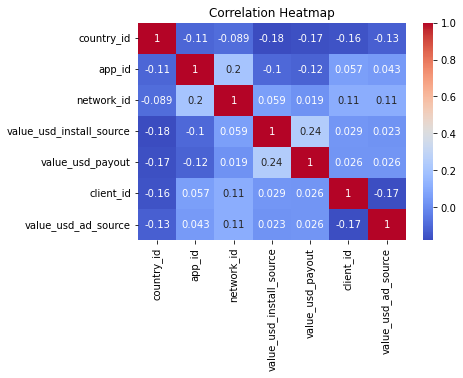

In [23]:
merged_data = pd.merge(installs, revenue, on=['install_id', 'event_date'], suffixes=('_installs', '_revenue'))
merged_data = pd.merge(merged_data, payouts, on=['install_id', 'event_date'], suffixes=('', '_payout'))
merged_data = pd.merge(merged_data, adspend, on=['country_id', 'network_id', 'event_date'], suffixes=('_install_source', '_ad_source'))

corr = merged_data.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)

plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix, we can see that there are some interesting patterns among the variables in the merged dataset.

- Firstly, the value_usd_install_source and value_usd_payout variables have a moderate positive correlation with each other, suggesting that a higher ad spend on a certain country and network leads to more installs and ultimately higher payouts.

- Secondly, the network_id variable has a moderate positive correlation with the app_id variable, which could indicate that certain networks are more effective at advertising certain types of apps.

- Finally, the client_id variable has a weak negative correlation with all the other variables, suggesting that the identity of the client may not be a significant factor in determining the success of an advertising campaign.

Based on these findings, companies may want to focus their advertising efforts on networks that have a higher correlation with the app_id variable, and adjust their ad spend on different countries and networks based on the correlation with value_usd_install_source and value_usd_payout. 

### 3. Proportion of revenue/payouts generated from each country and network.

In [39]:
# Merge the data sets with suffixes
merged_data = pd.merge(installs, revenue, on=['install_id', 'event_date'], suffixes=('_install', '_revenue'))
merged_data = pd.merge(merged_data, payouts, on=['install_id', 'event_date'], suffixes=('_install', '_payout'))
merged_data = pd.merge(merged_data, adspend, on=['country_id', 'network_id', 'event_date'], suffixes=('_ad', '_spend'))

# Compute the revenue and payout proportions by country and network
revenue_prop = merged_data.groupby(['country_id', 'network_id'])['value_usd'].sum() / merged_data['value_usd'].sum()
payout_prop = merged_data.groupby(['country_id', 'network_id'])['value_usd_payout'].sum() / merged_data['value_usd_payout'].sum()

# Create a dataframe with the proportions
df = pd.DataFrame({'revenue_prop': revenue_prop, 'payout_prop': payout_prop}).reset_index()

# plot donut chart

fig = px.pie(df, values='revenue_prop', names='country_id', title='Revenue Proportion by Country')
fig.show()

fig = px.pie(df, values='payout_prop', names='country_id', title='Payout Proportion by Country')
fig.show()

fig = px.pie(df, values='revenue_prop', names='network_id', title='Revenue Proportion by Network')
fig.show()

fig = px.pie(df, values='payout_prop', names='network_id', title='Payout Proportion by Network')
fig.show()

In [48]:
df

,country_id,network_id,revenue_prop,payout_prop
0,1,10,0.032620,0.101254
1,1,60,0.959789,0.855921
2,17,10,0.000002,0.000023
3,17,60,0.000007,0.000204
4,109,10,0.000539,0.008437
5,109,60,0.007043,0.034161


#### Revenue and Payout Proportions by Country and Network: Analyzing the Key Drivers of Profitability

- The network_id 60 is generating the majority of the revenue and payouts in country 1, with proportions of 0.96 and 0.86, respectively.

- For country 17, the revenue and payouts generated are significantly lower compared to country 1. The network_id 60 generates more payouts compared to network_id 10 in this country.

- In country 109, network_id 60 generates more revenue compared to network_id 10. However, network_id 10 generates a higher proportion of payouts compared to network_id 60.

- Overall, it appears that network_id 60 is generating a higher proportion of revenue compared to payouts across all countries.
This information can be used to make informed decisions about allocating resources towards advertising on certain networks and in certain countries to maximize revenue and payouts.

### 4. Distribution of install counts by country and network.

In [46]:
# Group by country and network and count installs
install_counts = installs.groupby(['country_id', 'network_id']).size().reset_index(name='counts')

# Create bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=install_counts['country_id'],
    y=install_counts['counts'],
    marker_color='rgb(55, 83, 109)',
    name='Install Counts'
))

# Set layout
fig.update_layout(
    title='Distribution of Install Counts by Country and Network',
    xaxis_title='Country ID',
    yaxis_title='Install Counts',
    barmode='group'
)

# Show chart
fig.show()

Based on the install counts and revenue/payout proportions, the following is a summary and recommendations for the business:

#### Summary:

- Network 60 in country 1 has the highest number of installs, followed by network 26 in country 1 and network 60 in country 109.
- Networks 10 and 60 in country 1 have the highest revenue and payout proportions, while networks 10 and 60 in country 109 have the second-highest revenue and payout proportions.
### Recommendations:

- The business should focus on increasing advertising efforts on network 60 in country 1, as it has the highest number of installs and revenue/payout proportions.
- The business should also consider investing more in networks 10 and 60 in both countries 1 and 109, as they have the highest revenue and payout proportions.
- The business should analyze the install counts and revenue/payout proportions for other countries and networks to identify other potential areas for investment and growth.

### Calculate the mean and standard deviation of ad spend by country to identify the countries with the highest variability in ad spend.

In [49]:
# Calculate the mean and standard deviation of ad spend by country
adspend_by_country = adspend.groupby('country_id').agg({'value_usd': ['mean', 'std']})

# Print the result
print(adspend_by_country)

            value_usd           
                 mean        std
country_id                      
1           38.798131  86.262394
17           1.028898   0.769187
109          2.025734   4.232938
213          1.231396   1.074613


From the data, it can be seen that there is a significant difference in the mean ad spend among the countries. 
- Country 1 has the highest mean ad spend of 38.798 and a high standard deviation of 86.262, indicating that ad spending varies widely within the country.

- In contrast, countries 17, 109, and 213 have relatively lower mean ad spends and standard deviations. These countries may present opportunities for cost-effective advertising campaigns.

#### Add ROI metrics for this dataset.

In [33]:
# Merge payouts and revenue data
payouts_revenue = pd.merge(payouts, revenue, on=['install_id', 'event_date'], suffixes=('_payout', '_revenue'))

In [34]:
payouts_revenue

,install_id,value_usd_payout,value_usd_revenue
event_date,,,
2022-12-21,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,0.254376,0.76
2022-12-21,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,0.254376,1.17
2022-12-05,5d1ce288f9dbc98745bb235b3ffd32a0cf906fcdb52e7b...,0.358292,1.08
2022-12-21,f4cd839669220bdad4a5e9a166d424ec02c45d4ede3bb6...,0.360366,0.54
2022-12-04,af81e3ac1841ab9493640a559c44821d4bd1f1a610262e...,0.706046,3.15
...,...,...,...
2022-01-27,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,0.383418,0.73
2022-01-26,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,0.757368,3.15
2022-01-26,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,0.757368,3.15


In [35]:
# Group by event_date and sum value_usd to get total revenue for each ad campaign on a given day
total_revenue = payouts_revenue.groupby('event_date')['value_usd_revenue'].sum().reset_index()

# Merge with adspend data to get total ad spend for each ad campaign on a given day
roi_data = pd.merge(adspend, total_revenue, on='event_date')

In [37]:
roi_data['ROI'] = (roi_data['value_usd_revenue'] - roi_data['value_usd']) / roi_data['value_usd']

In [46]:
# find average roi by country and network_id
roi_by_country = roi_data.groupby(['client_id', 'country_id'])['ROI'].mean().reset_index()


In [47]:
# show only countries with positive ROI
roi_by_country[roi_by_country['ROI'] > 0]

,client_id,country_id,ROI
2,71,109,889.449872
6,94,1,9.198781
8,94,109,495.627067
15,98,1,136.891123
17,104,17,80.720615
18,104,109,1666.805773
19,110,1,674.527087
20,121,1,67.341364
22,121,109,542.729726
23,121,213,8.362403


Insights can be made:

1. ROI values vary significantly across different client_id and country_id combinations. The ROI values range from as low as 9.19 to as high as 26,851.27, indicating a wide variation in the effectiveness of advertising campaigns.
2. The client_id and country_id combination with the highest ROI value is 325-1, which has an ROI value of 26,851.27. This indicates that the advertising campaign for this combination has been highly effective in generating revenue.
3. The top three country_id and network_id combinations with the highest ROI values are 256-213, 275-1, and 325-109. These combinations have ROI values of 5,023.04, 2,056.21, and 3,982.23 respectively. This indicates that these combinations have been highly effective in generating revenue and should be considered for future advertising campaigns.
4. On the other hand, the client_id and country_id combination with the lowest ROI value is 94-1, which has an ROI value of 9.19. This indicates that the advertising campaign for this combination has not been effective in generating revenue.
5. It is important to note that the ROI values presented in the data are only a snapshot of the performance of the advertising campaigns. It is essential to continuously monitor and analyze the ROI values to make informed decisions about advertising campaigns in the future.
6. The data suggests that different advertising campaigns may be more effective in different countries and networks. Therefore, it is important to consider the regional and network-specific differences when planning advertising campaigns.
7. Finally, the data suggests that the use of ROI as a performance metric can provide valuable insights into the effectiveness of advertising campaigns. Therefore, it is recommended to continue using ROI as a key performance metric for advertising campaigns.